# Big Data Final Project-SaiKrishna

In [0]:
# fetching the text data from url
import urllib.request 
stringInURL = "https://www.gutenberg.org/files/65115/65115-0.txt"
urllib.request.urlretrieve(stringInURL,"/tmp/power.txt")

Out[1]: ('/tmp/power.txt', <http.client.HTTPMessage at 0x7f9a20115e80>)

In [0]:
# moved file from temp folder to databricks storage folder of dbfs
dbutils.fs.mv("file:/tmp/power.txt","dbfs:/data/throughPower.txt")

Out[2]: True

In [0]:
# transfer the data file into Spark
powerRawRDD= sc.textFile("dbfs:/data/throughPower.txt")

# Cleaning the data

In [0]:
# separating the words from each using flatmap function
# changing all the words to lower case and then removing the spaces between them
powerMessyTokensRDD = powerRawRDD.flatMap(lambda eachLine: eachLine.lower().strip().split(" "))

In [0]:
# removing punctuations
# importing regular expression library
import re
wordsAfterCleanedTokensRDD = powerMessyTokensRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))


In [0]:
# removing all the stop words from the data using filter function
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
powerWordsRDD = wordsAfterCleanedTokensRDD.filter(lambda word: word not in stopwords)

In [0]:
# removing all the empty spaces from the data
powerRemoveSpaceRDD = powerWordsRDD.filter(lambda x: x != "")

# Processing the data

In [0]:
# map() words to (word,1) immediate key-value pairs
powerPairsRDD = powerRemoveSpaceRDD.map(lambda eachWord: (eachWord,1))

In [0]:
# transforming the words using reduceByKey() to get (word,count) results
powerWordCountRDD = powerPairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
#collect() action to get back to python
results = powerWordCountRDD.collect()
print(results)

[('project', 90), ('gutenberg', 31), ('ebook', 13), ('power', 58), ('bounds', 3), ('use', 16), ('anyone', 5), ('anywhere', 2), ('united', 18), ('world', 30), ('restrictions', 2), ('whatsoever', 2), ('may', 102), ('give', 29), ('away', 6), ('reuse', 2), ('online', 5), ('check', 4), ('country', 5), ('using', 6), ('title', 1), ('april', 1), ('language', 2), ('set', 21), ('encoding', 1), ('utf', 1), ('produced', 5), ('brian', 1), ('wilson', 2), ('team', 1), ('generously', 1), ('internet', 1), ('archiveamerican', 1), ('start', 4), ('errors', 3), ('replaced', 1), ('full', 32), ('italics', 1), ('underscores', 1), ('precede', 1), ('chapter', 4), ('relevant', 1), ('forewords', 2), ('c', 7), ('dixon', 3), ('mr', 5), ('head', 13), ('twelfth', 1), ('edition', 2), ('marshall', 1), ('new', 13), ('york', 1), ('hunt', 1), ('barnard', 1), ('co', 1), ('printers', 1), ('book', 3), ('glanced', 2), ('aside', 2), ('read', 10), ('convenient', 1), ('though', 10), ('never', 54), ('heard', 4), ('till', 14), ('christmas', 1), ('thought', 18), ('must', 82), ('something', 2), ('worth', 6), ('selected', 1), ('two', 13), ('page', 4), ('came', 3), ('looking', 7), ('delight', 2), ('last', 7), ('felt', 15), ('like', 25), ('praying', 122), ('pulsates', 1), ('heart', 96), ('mind', 8), ('pray', 48), ('known', 3), ('earnest', 9), ('others', 14), ('know', 11), ('realized', 3), ('extent', 4), ('share', 2), ('britain', 1), ('beyond', 8), ('members', 3), ('devoted', 8), ('unions', 2), ('already', 2), ('yet', 13), ('instant', 3), ('ceasing', 2), ('clear', 7), ('diagnosis', 1), ('cause', 11), ('perfect', 12), ('greatest', 11), ('work', 104), ('enter', 4), ('school', 8), ('contents', 1), ('upon', 12), ('alike', 2), ('appeal', 2), ('worker', 1), ('stimulate', 1), ('relationships', 1), ('deserves', 1), ('circulation', 1), ('amongst', 2), ('indeed', 4), ('revival', 2), ('true', 36), ('religion', 13), ('ambassadors', 1), ('moslem', 1), ('heartily', 1), ('commend', 1), ('trumpet', 2), ('call', 13), ('arise', 2), ('minister', 6), ('used', 6), ('far', 11), ('take', 9), ('expecting', 1), ('help', 10), ('stand', 3), ('sinners', 2), ('say', 17), ('doth', 2), ('make', 38), ('save', 3), ('compassion', 4), ('rather', 2), ('sensual', 1), ('laziness', 2), ('injurious', 1), ('looked', 1), ('days', 11), ('poetry', 2), ('monthly', 1), ('journals', 1), ('notorious', 1), ('perhaps', 3), ('reference', 1), ('good', 23), ('congregation', 3), ('retirement', 4), ('honour', 3), ('glory', 9), ('universal', 2), ('holiness', 21), ('depends', 4), ('sermons', 11), ('week', 1), ('covetous', 2), ('praise', 4), ('eating', 1), ('ministry', 55), ('texts', 3), ('best', 10), ('three', 10), ('hours', 32), ('prayerrobertmurray', 1), ('mccheyne', 5), ('constantly', 1), ('stretch', 3), ('organizations', 2), ('lose', 3), ('plan', 3), ('anything', 5), ('sent', 3), ('whose', 12), ('name', 7), ('john', 4), ('heralded', 1), ('prepared', 6), ('way', 19), ('us', 28), ('child', 3), ('son', 6), ('worlds', 3), ('salvation', 4), ('cradled', 1), ('paul', 23), ('solves', 1), ('mystery', 4), ('success', 11), ('staked', 1), ('eyes', 3), ('run', 3), ('earth', 10), ('toward', 6), ('necessity', 12), ('vital', 5), ('sun', 3), ('sphere', 1), ('confusion', 1), ('ensue', 1), ('needs', 4), ('novel', 2), ('ghost', 5), ('usemen', 1), ('mighty', 16), ('eminent', 3), ('said', 15), ('accidents', 2), ('nations', 2), ('philosophic', 1), ('democratic', 1), ('politicians', 1), ('allow', 3), ('transfigure', 1), ('individuals', 1), ('mars', 1), ('flows', 3), ('open', 6), ('possible', 2), ('sermon', 31), ('lifegiving', 9), ('milk', 1), ('bosom', 1), ('says', 16), ('treasure', 4), ('impregnates', 3), ('preaching', 94), ('performance', 5), ('twenty', 2), ('years', 8), ('grows', 3), ('termed', 1), ('degraded', 2), ('eccentricities', 1), ('diverted', 1), ('put', 21), ('executed', 3), ('pauline', 1), ('aflame', 2), ('empowered', 1), ('scattered', 2), ('sea', 2), ('inspiration', 4), ('form', 15), ('feature', 7), ('moulding', 1), ('silence', 2), ('dies'

In [0]:
sorted(results, key=lambda t: t[1], reverse=True)[:10]

Out[22]: [('prayer', 247),
 ('god', 240),
 ('praying', 122),
 ('preacher', 111),
 ('work', 104),
 ('may', 102),
 ('heart', 96),
 ('preaching', 94),
 ('project', 90),
 ('men', 87)]

In [0]:
output = sorted(results, key=lambda t: t[1], reverse=True)[:15]
print(output)

[('prayer', 247), ('god', 240), ('praying', 122), ('preacher', 111), ('work', 104), ('may', 102), ('heart', 96), ('preaching', 94), ('project', 90), ('men', 87), ('must', 82), ('man', 76), ('life', 75), ('gods', 72), ('great', 64)]

# Charting the data

In [0]:
# Displaying the obtained results
# importing all the libraries to plot the graph
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# preparing chart information
source = 'The Project Power Through Prayer by Edward M. Bounds'
title = 'Top Words in ' + source
xlabel = 'Words'
ylabel = 'Count'

Out[26]:

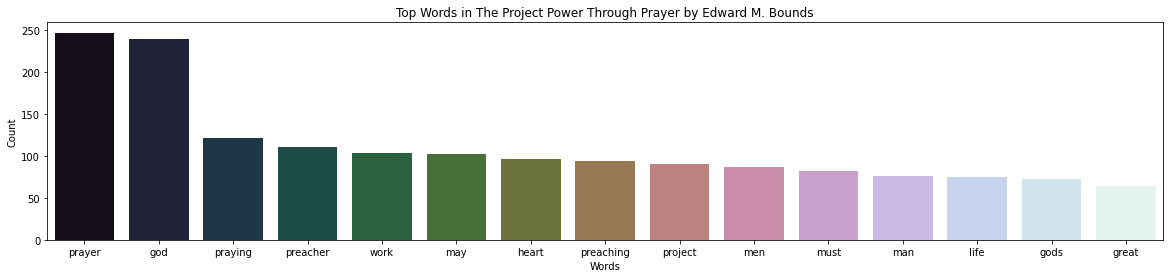

Text(0.5, 1.0, 'Top Words in The Project Power Through Prayer by Edward M. Bounds')

In [0]:
df = pd.DataFrame.from_records(output, columns =[xlabel, ylabel]) 
plt.figure(figsize=(20,4))
sns.barplot(xlabel, ylabel, data=df, palette="cubehelix").set_title(title)

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Collecting wordcloud
 Downloading wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
Collecting pillow
 Downloading Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl (3.0 MB)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
Installing collected packages: pillow, wordcloud
Successfully installed pillow-8.2.0 wordcloud-1.8.1
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-8c6138c7-66dd-429c-b9bf-6e97e0a56ce9/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Downloading nltk-3.6.2-py3-none-any.whl (1.5 MB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Collecting click
 Downloading click-7.1.2-py2.py3-none-any.whl (82 kB)
Collecting regex
 Downloading regex-2021.4.4-cp38-cp38-manylinux2014_x86_64.whl (733 kB)
Collecting tqdm
 Downloading tqdm-4.60.0-py2.py3-none-any.whl (75 kB)
Installing collected packages: click, regex, tqdm, nltk
Successfully installed click-7.1.2 nltk-3.6.2 regex-2021.4.4 tqdm-4.60.0
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-8c6138c7-66dd-429c-b9bf-6e97e0a56ce9/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import nltk
nltk.download('popular') # nltk a library that takes in the list of words and outputs a popular word cloud image.

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Unzipping corpora/cmudict.zip.
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Unzipping corpora/gazetteers.zip.
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Unzipping corpora/genesis.zip.
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Unzipping corpora/gutenberg.zip.
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Unzipping corpora/inaugural.zip.
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/movie_reviews.zip.
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Unzipping corpora/names.zip.
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Unzipping corpora/shakespeare.zip.
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Unzipping corpora/stopwords.zip.
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Unzipping corpora/treebank.zip.
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/twitter_samples.zip.
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Unzipping corpora/omw.zip.
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet.zip.
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet_ic.zip.
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Unzipping corpora/words.zip.
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Unzipping tokenizers/punkt.zip.
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] | 
[nltk_data] Done downloading collection popular
Out[1]: True

Preprocessed Data: ﻿the project gutenberg ebook power prayer , edward bounds ebook use anyone anywhere united states parts world cost almost restrictions whatsoever may copy , give away re-use terms project gutenberg license included ebook online www gutenberg org located united states , check laws country located using ebook title : power prayer author : edward bounds release date : april 19 , 2021 [ ebook # 65115 ] language : english character set encoding : utf-8 produced : brian wilson , chris pinfield online distributed proofreading team https : //www pgdp net ( file produced images generously made available internet archive/american libraries ) * * * start project gutenberg ebook power prayer * * * transcriber 's note : obvious printer errors corrected hyphenation rationalised small capitals replaced full capitals italics indicated _underscores_ quotations precede chapter moved follow relevant chapter number power prayer e bounds forewords rev c dixon , , mr albert head _twelfth edition_ marshall brothers , ltd _publishers_ , london , edinburgh & new york hunt , barnard & co , ltd printers , london & aylesbury forewords rev c dixon , little book given friend glanced laid aside , thinking would read convenient time , though never heard author forgotten till christmas , received another copy present another friend `` well , '' thought , `` must something worth little book , would selected present two intelligent people `` read first page till came words : `` man god 's method church looking better methods ; god looking better men `` enough whet appetite , greedily read chapter chapter delight blessing last sentence finished felt knew prayer began read , , better , felt like praying every page pulsates heart mind man knows pray ; knows men known pray , earnest desiring others know pray desire realized extent , case least one , would like others share blessing author kindly consented reprint great britain c dixon ii mr albert head one need felt beyond another members church christ to-day , power _in_ prayer—desire _for_ prayer—time devoted _to_ prayer number unions prayer exist already , yet members continue `` instant prayer '' `` pray without ceasing `` author book makes clear diagnosis case writes follows : — '' never cause god need perfect illustrations possibilities prayer age pray greatest thing must learn anew work prayer , enter anew school prayer `` contents message upon prayer read alike preacher teacher , evangelist intercessor pages contain appeal every `` worker together christ , '' stimulate desire prayer varied relationships christian life appeal deserves wide circulation amongst members prayer circles prayer unions , , indeed , amongst looking revival true religion land , exodus ambassadors christ heathen moslem populations heartily commend reading , feeling persuaded god given author trumpet call church christ `` arise pray `` albert head _recreation minister must whetting mower—that , used far necessary work may physician plague-time take relaxation recreation necessary life , many expecting help case life death ? stand see sinners gasping pangs death , say : `` god doth require make drudge save ? '' voice ministerial christian compassion rather sensual laziness diabolical cruelty ? _—richard baxter _misemployment time injurious mind illness looked back self-reproach days spent study : wading history poetry monthly journals , study ! another man 's trifling notorious observers , ? nothing , perhaps , reference spiritual good congregation much retirement prayer study honour glory master _—richard cecil _study universal holiness life whole usefulness depends , sermons last hour two ; life preaches week satan make covetous minister lover praise , pleasure , good eating , ruined ministry give prayer , get texts , thoughts , words god luther spent best three hours prayer _—robert murray mccheyne constantly stretch , strain , devise new methods , new plans , new organizations advance church secure enlargement eff

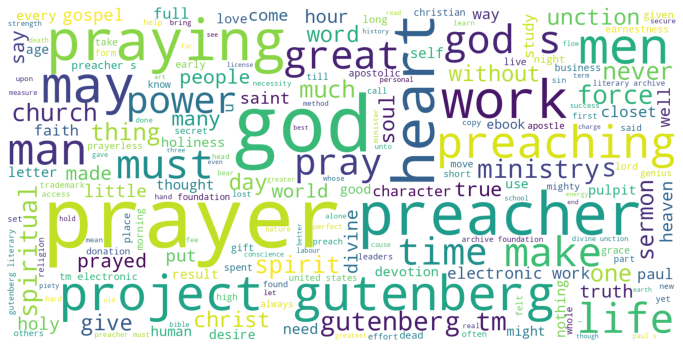

In [0]:
# importing all the required libraries
import matplotlib.pyplot as plt
import nltk
import wordcloud
from nltk.corpus import stopwords # to remove the stopwords from the data
from nltk.tokenize import word_tokenize #  breaking down the text into smaller units called tokens
from wordcloud import WordCloud # creating an image using words in the data
 
# defining the functions to process the data
class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data
 
    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="white").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
 
wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
import urllib.request
url = "https://www.gutenberg.org/files/65115/65115-0.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')
 
input_text1 = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text1)
wordcloud_generator.create_word_cloud(clean_data)
 
